<a href="https://colab.research.google.com/github/YuriQuisbert/DeteccaoFraudeCartoesCredito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*desenvolvido por:*


<img alt="Colaboratory logo" width="25%" src="https://github.com/YuriQuisbert/pessoal/blob/main/Yuri%20Quisbert..png?raw=true">

---
🚀 [*yuriquisbert.com.br*](yuriquisbert.com.br)

---


# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

# Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

# Análise Exploratória

Primeiramente, vou visualizar o nosso *database*, trazendo as 5 primeiras linhas.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Aqui é possível averiguar como as variáveis estão organizadas, como são dados confidenciais, é impossível saber o que cada uma representa, entretanto, é completamente possível realisar nossas análises e predições!

---

Em seguida, é importante avaliar como as variáveis se distribuem, o método `describe()` é ótimo para esse tipo de análise, além disso, é importante saber se existem campos nulos no *database*.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum().sum()

0

Acima vemos que não existem capos nulos no *dataset*.

---

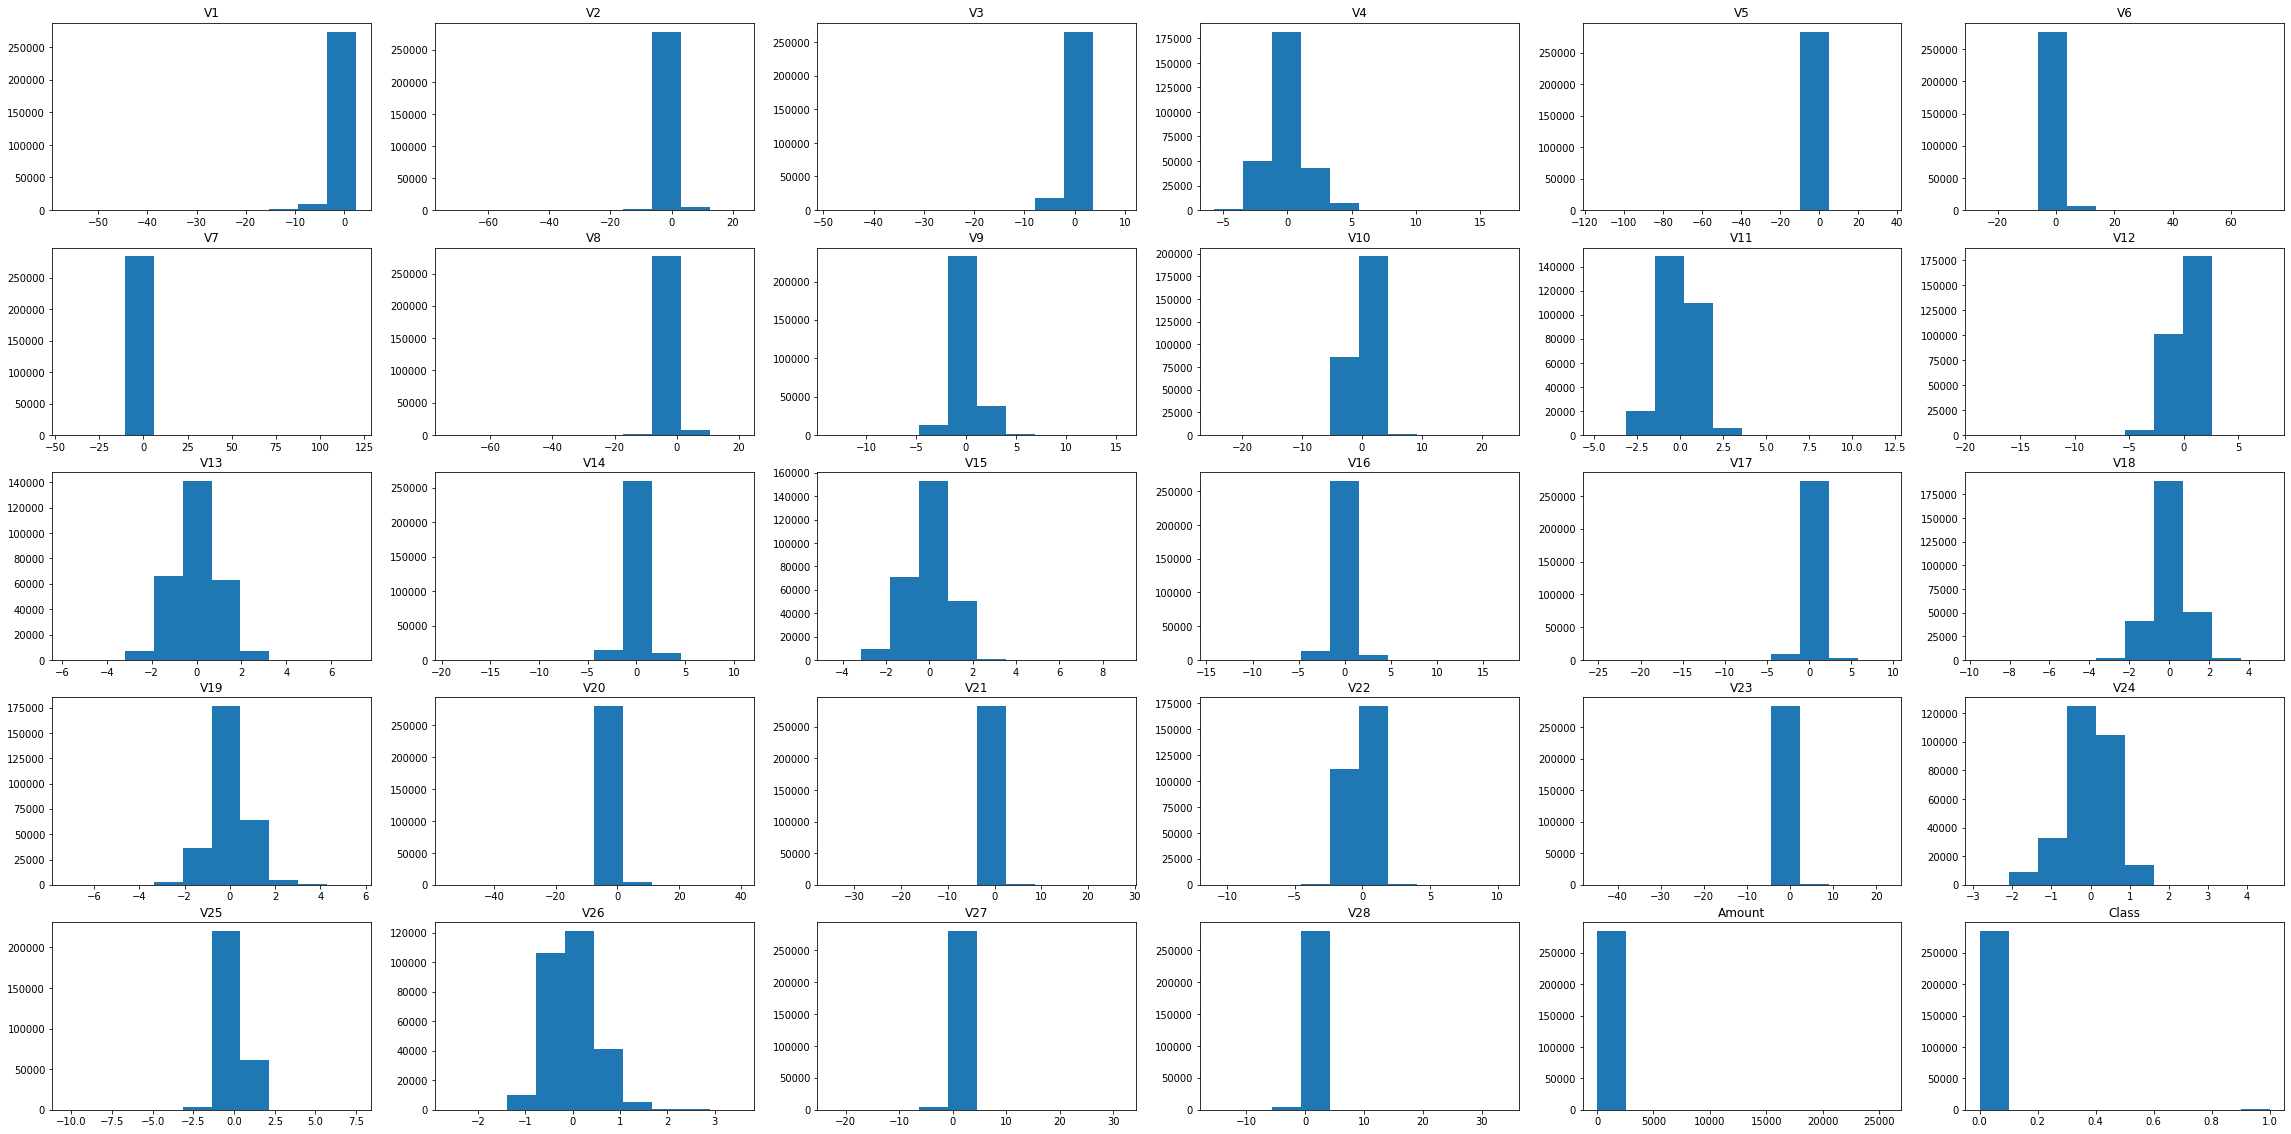

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(40,20))

j = 1
while j < len(df.columns):
  for i in range(5):
    for n in range(6):
      ax[i][n].hist(df.columns[j], data=df)
      ax[i][n].set_title(df.columns[j])
      j = j + 1

plt.show()

Nos gráficos apresentados vemos que são poucas as variáveis que tendem a respeitar uma curva normal (a coluna V13 é aquela que mais se assemelha), a grande maioria tem um ou dois grandes picos de informação.

---

Sabemos, impiricamente, que naturalmente as compras fraudulentas são uma grande minoria dentre todas as compras efetuadas com cartão de crédito. Vamos ver como esses dados se distribuem no nosso *dataset*.

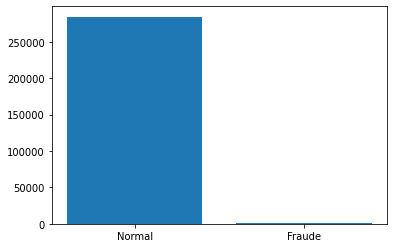

In [ ]:
fig, ax = plt.subplots()

ax.bar(x = df.Class.unique(), height = df.Class.value_counts())
ax.set_xticks(ticks=range(2))
ax.set_xticklabels(labels=['Normal','Fraude'])

plt.show()

In [ ]:
count = df.Class.value_counts()
count

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
print(f'''A quantidade de entradas fraudulentas neste dataset representa:
{(count[1]/count[0] * 100):.2f}% do total de entradas''')

A quantidade de entradas fraudulentas neste dataset representa:
0.17% do total de entradas


No caso do *dataset* utilizado, de todas as entradas, apenas 0.17% são caracterizadas como fraudulentas!

In [ ]:
dftrue = df.loc[df['Class'] == 0]
dffalse = df.loc[df['Class'] == 1]

<function matplotlib.pyplot.show>

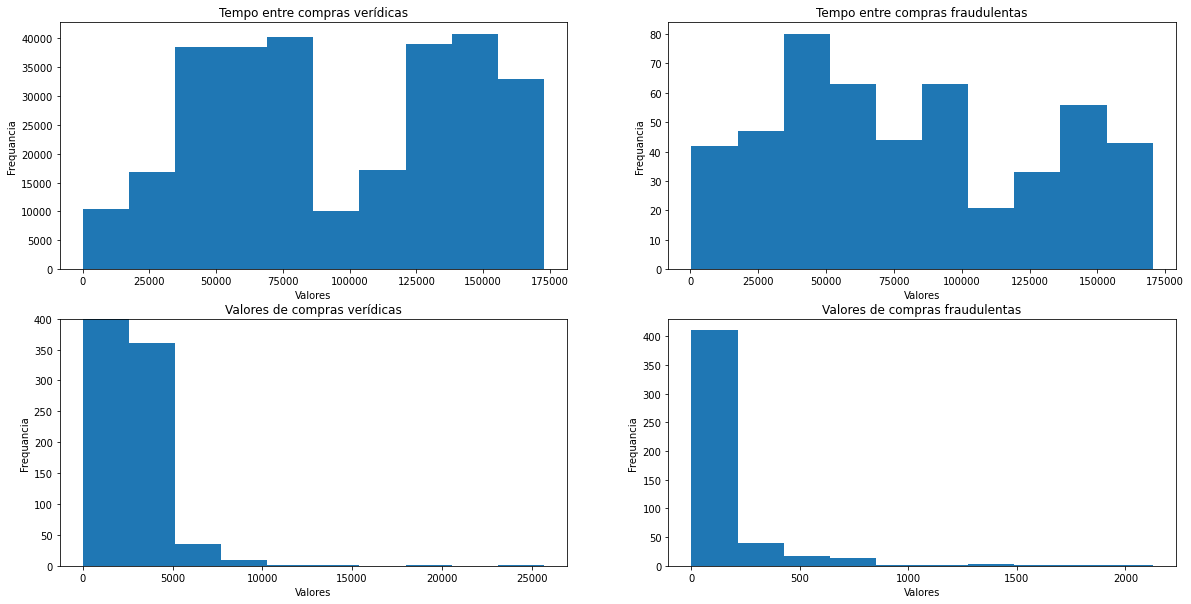

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,10))

ax[0][0].hist(x = dftrue.Time)
ax[0][1].hist(x = dffalse.Time)
ax[1][0].hist(x = dftrue.Amount)
ax[1][0].set_ylim(0, 400)
ax[1][1].hist(x = dffalse.Amount)
title = ['Tempo entre compras verídicas', 'Tempo entre compras fraudulentas', 'Valores de compras verídicas', 'Valores de compras fraudulentas']
t=0

for i in range(0,2):
  for j in range(0,2):
    ax[i][j].set_title(title[t])
    ax[i][j].set_ylabel("Frequancia")
    ax[i][j].set_xlabel("Valores")
    t=t+1
plt.show

Acima foram construidos quatro histogramas, para as variáveis `time`(`tempo`) `amount`(`quantia`), divididos por compras verídicas e fraudulentas.

* Vemos que para a variável tempo, pouca informação é abstraída.
* Entretanto, para quantias, vemos que a grande maioria das fraudes são de quantias relativamente baixas (abaixo dos U$500,00).


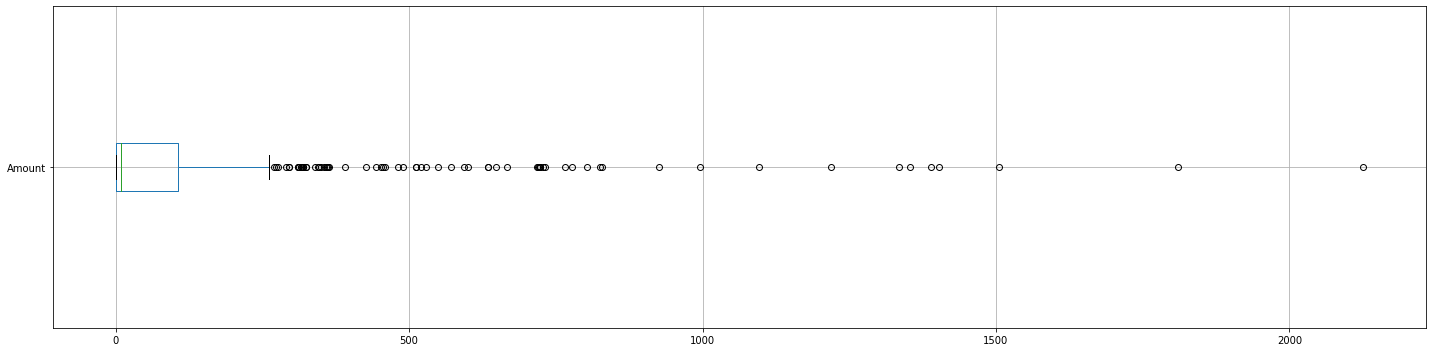

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))

dffalse.boxplot(['Amount'], ax=ax, vert=False)

plt.tight_layout()

Esse último fato é confirmado pelo *boxplot* apresentado, onde os valores se acumulam no começo do gráfico, e valores até mesmo menores que U$ 500,00 já são considerados *outliers*.

---

Em seguida, vou apresentar uma matriz de correlação entre variáveis, para que o modelo funcione bem, é interessante que não haja uma correlação entre variáveis independentes (próximo a 0) e exista correlação entre as variáveis independentes com o alvo (próximo a 1 ou -1).

In [ ]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
corrlist = pd.DataFrame(corr.iloc[:,-1].abs().sort_values(ascending=False))
corrlist = corrlist.loc[corrlist['Class'] < 0.1].index.tolist()

Na matriz é possível perceber que quase não existe correlação entre variáveis independentes. Já quando olhamos para a variável Alvo, vemos algumas correlações relativamente boas, enquanto outras próximas a 0.

Devido isso, deixei uma lista com as varíaveis que pouco influenciam na Alvo guardada, isso será usado posteriormente.

# Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

Para nosso modelo, é importante que todos os dados estejam normalizados, de forma que suas grandezas não influenciem no resultado. Esse processo será feito na próxima célula.

In [ ]:
scaler = StandardScaler().fit(df[['Time', 'Amount']])
df[['Time', 'Amount']] = scaler.transform(df[['Time', 'Amount']])

Em seguida, farei a divisão entre treino e teste do nosso *dataset*, entretanto, como foi abordado anteriormente, existe uma grande discrepância entre dados Positivos e Negativos, para melhorar essa distribuição temos duas opções:
 
* Remover dados não-fraudulentos, para ter uma quantidade próxima dos dados de fraude
* Criar novos dados fraudulentos, copiando os dados já existentes, e assim chegando próximo a uma igualdade 

In [ ]:
X = df.drop('Class', axis=1)
y = df.Class

In [ ]:
smote = SMOTE(random_state = 32)
X, y = smote.fit_resample(X, y)
y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Neste caso, foi escolhida a segunda opção, copiando dados já existentes para termos um *dataset* equilibrado.

# Modelo de Machine Learning

O primeiro modelo que escolhi foi a de **Regressão Logistica**:

O modelo de regressão logística é baseado em uma função logística, que é uma função Sigmoide que pode ser usada para modelar a relação entre um conjunto de variáveis explanatórias e uma variável alvo.

A saída dessa função sempre estará entre 0 e 1, o que a torna ideal para modelar uma variável de resposta binária. Se a variável de resposta for 1, isso significa que o evento ocorreu, enquanto que se a variável de resposta for 0, isso significa que o evento não ocorreu.


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

O segundo modelo escolhido foi o de **Árvore de Decisão**:

Uma árvore de decisão é uma estrutura de decisão composta por nós de decisão e nós de folha. Os exemplos de treinamento são divididos recursivamente em subconjuntos mais homogêneos, até que os subconjuntos sejam puramente compostos por exemplos de uma classe.

In [ ]:
model2 = DecisionTreeClassifier(criterion="entropy")
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred2 = model2.predict(X_test)

Por fim, vou repetir os mesmos dois modelos, mas agora em um *dataset* sem as colunas que pouco influênciam no resultado da variável Alvo. 

Isso porque essas colunas que não se correlacionam com nosso objetivo podem atrapalhar o aprendizado de máquina do nosso modelo.

In [ ]:
X_train2 = X_train.drop(corrlist, axis=1)
X_test2 = X_test.drop(corrlist, axis=1)

In [ ]:
model3 = LogisticRegression()
model3.fit(X_train2, y_train)

LogisticRegression()

In [ ]:
y_pred3 = model3.predict(X_test2)

In [ ]:
model4 = DecisionTreeClassifier(criterion="entropy")
model4.fit(X_train2, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred4 = model4.predict(X_test2)

# Avaliar o desempenho do modelo

Quando fazemos uma predição é normal que ocorram erros onde o modelo define uma entrada de maneira equivocada. No nosso caso existem duas possibilidades de erro:

* Dizer que uma compra é fraudulenta, quando na realidade não é
* Dizer que é uma compra verídica, quando na realidade é uma fraude

Para o algoritmo, ambos os erros possuem o mesmo peso, entretanto nós sabemos que as consequências de autorizar uma compra fraudulenta são muito piores do que anular uma compra que era legítma.

Dessa maneira, buscaremos minimizar principalmente o segundo tipo de erro!

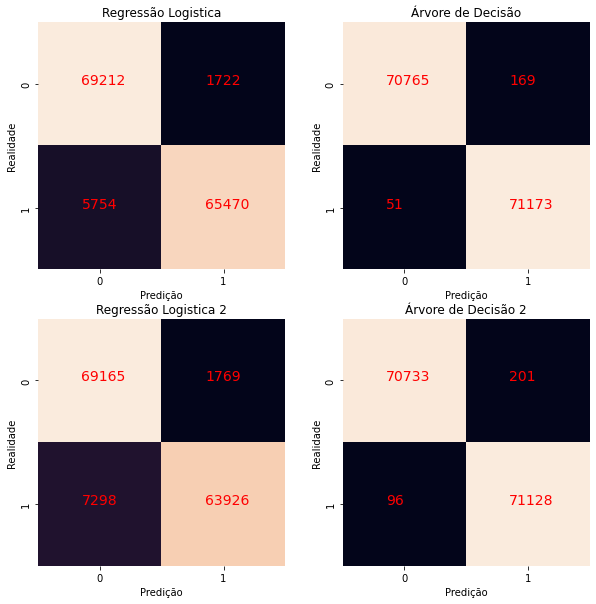

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize = (10,10))

title = ['Regressão Logistica', 'Árvore de Decisão','Regressão Logistica 2', 'Árvore de Decisão 2' ]
values = [confusion_matrix(y_test, y_pred), confusion_matrix(y_test, y_pred2), confusion_matrix(y_test, y_pred3), confusion_matrix(y_test, y_pred4)]
t=0

for i in range(0,2):
  for j in range(0,2):
    sns.heatmap(values[t], annot=False,ax=ax[i][j],square=True,cbar=False)
    ax[i][j].set_title(title[t])
    ax[i][j].set_ylabel("Realidade")
    ax[i][j].set_xlabel("Predição")
    for m in range(0,2):
      for n in range(0,2):
        ax[i][j].annotate(values[t][n][m], xy = (m,n), xytext = (m+0.35,n+0.5), color='r', fontsize=14, fontweight='medium')
    t=t+1

Acima vemos como os modelos de Regressão Logísticas foram inferiores aos modelos de Árvore de Decisão, e dentro dessa categoria, o melhor modelo foi aquele que manteve o *dataset* completo.

Como vemos, os erros de autorização de compra em processos fraudulentos são os menores valores, por mais que ainda sejam valores significativos.

In [ ]:
ac=[]
#print('Acurácia:')
for i in range(0,4):
  a = (values[i][0][0]+values[i][1][1])/len(y_test)
  ac.append(a)

pr=[]
#print('Precisão:')
for i in range(0,4):
  a = values[i][0][0]/(values[i][0][0]+values[i][1][0])
  pr.append(a)

re=[]
#print('Recall:')
for i in range(0,4):
  a = values[i][0][0]/(values[i][0][0]+values[i][0][1])
  re.append(a)

f1=[]
#print('F1-Score:')
for i in range(0,4):
  a = (pr[i]*re[i])/(pr[i]+re[i])
  f1.append(a)


print('\t\t\t\tAcurária\tPrecisão\tRecall\t\t  F1-Score\n')
for i in range(0,4):
  print(f'''{title[i]}:\t\t{ac[i]:.4f}\t\t{pr[i]:.4f}\t\t{re[i]:.6f}\t  {f1[i]:.4f}''')

				Acurária	Precisão	Recall		  F1-Score

Regressão Logistica:		0.9474		0.9232		0.975724	  0.4744
Árvore de Decisão:		0.9985		0.9993		0.997618	  0.4992
Regressão Logistica 2:		0.9362		0.9046		0.975061	  0.4692
Árvore de Decisão 2:		0.9979		0.9986		0.997166	  0.4990


Acima temos algumas métricas que mostram como o modelo de árvore de decisão se saiu melhor nessa situação.

# Conclusão

Para criar um modelo preditivo, muitos cuidados devem ser tomados, tratar os dados, normaliza-los, balancea-los e entender suas correlações são processos que devemos realizar antes mesmo de começar o desenvolvimento do algoritmo. 


Além disso, é muito importante saber quais são as regras de negócio de cada situação, no nosso caso, os erros possuiam penalidades diferentes e isso deve ser levado em conta no nosso desenvolvimento.

Entender cada caso e suas necessidades é essencial, estavamos tratando de um modelo de classificação binária, ou seja, fraude ou não-fraude, de maneira que os melhores modelos a serem escolhidos eram os de Regressao Logistica e os de Árvore de Decisão.

Por fim, vimos que a Árvore de Decisão foi o modelo que melhor se encaixou no nosso problema.